In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [31]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Month'] = df['Formatted Date'].dt.month

In [32]:
df = df.drop(columns=[
    'Formatted Date',
    'Summary',
    'Precip Type',
    'Daily Summary'
])

In [33]:
df.fillna(df.mean(numeric_only=True), inplace=True)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,3
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,3
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,4
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,4
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,4
...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,9
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,9
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,9
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,9


In [34]:
monthly_df = df.groupby('Month').mean().reset_index()
monthly_df

,Month,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,1,0.815678,-1.938761,0.850698,11.515865,180.460655,7.835825,0.0,1006.245222
1,2,2.166880,-0.555908,0.813407,12.180815,188.733253,8.730536,0.0,1003.925126
2,3,6.914976,5.082583,0.702849,13.415825,186.632698,10.922231,0.0,1001.564999
3,4,12.769200,12.158287,0.641051,11.876139,186.435859,11.784991,0.0,1009.995154
4,5,16.874455,16.733265,0.691650,10.953186,188.143328,11.889730,0.0,1003.376970
5,6,20.728510,20.755415,0.686418,9.632453,202.804924,11.994000,0.0,1002.019582
6,7,22.965462,22.977605,0.639593,9.637124,202.937049,12.188605,0.0,1008.562854
7,8,22.339134,22.264600,0.635300,8.942707,195.211135,12.454307,0.0,1001.470591
8,9,17.503458,17.389856,0.689163,9.610204,187.515025,11.598414,0.0,1000.835433
9,10,11.334119,10.684673,0.774443,10.008495,177.004765,9.729957,0.0,1003.099488


In [35]:
X = monthly_df[['Month']]                
y = monthly_df[['Temperature (C)']]   

In [36]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X).T
y_scaled = y_scaler.fit_transform(y).reshape(-1)

In [37]:
class LinearRegressionScratch:
    def __init__(self, dim, lr=0.1):
        self.lr = lr
        self.w = np.zeros(dim)

    def forward(self, x):
        return self.w.T @ x

    def backward(self, x, y_hat, y):
        m = x.shape[1]
        self.dw = (1/m) * ((y_hat - y) @ x.T).T

    def optimize(self):
        self.w -= self.lr * self.dw

In [45]:
dim = X_scaled.shape[0]
m = X_scaled.shape[1]

model = LinearRegressionScratch(dim=dim, lr=0.1)

num_epochs = 10000
loss_history = []

for i in range(num_epochs):
    y_hat = model.forward(X_scaled)
    loss = (1 / (2*m)) * ((y_scaled - y_hat) ** 2).sum()
    loss_history.append(loss)

    model.backward(X_scaled, y_hat, y_scaled)
    model.optimize()

    if i % 500 == 0:
        print(f"Epoch {i} | Loss {loss}")

Epoch 0 | Loss 0.5
Epoch 500 | Loss 0.4825063496623977
Epoch 1000 | Loss 0.4825063496623977
Epoch 1500 | Loss 0.4825063496623977
Epoch 2000 | Loss 0.4825063496623977
Epoch 2500 | Loss 0.4825063496623977
Epoch 3000 | Loss 0.4825063496623977
Epoch 3500 | Loss 0.4825063496623977
Epoch 4000 | Loss 0.4825063496623977
Epoch 4500 | Loss 0.4825063496623977
Epoch 5000 | Loss 0.4825063496623977
Epoch 5500 | Loss 0.4825063496623977
Epoch 6000 | Loss 0.4825063496623977
Epoch 6500 | Loss 0.4825063496623977
Epoch 7000 | Loss 0.4825063496623977
Epoch 7500 | Loss 0.4825063496623977
Epoch 8000 | Loss 0.4825063496623977
Epoch 8500 | Loss 0.4825063496623977
Epoch 9000 | Loss 0.4825063496623977
Epoch 9500 | Loss 0.4825063496623977


In [46]:
y_pred_scaled = model.forward(X_scaled)

y_true = y_scaler.inverse_transform(y_scaled.reshape(-1,1))
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1))

In [47]:
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 59.73605132952505
MAE: 6.977994319458264
R² Score: 0.03498730067520428


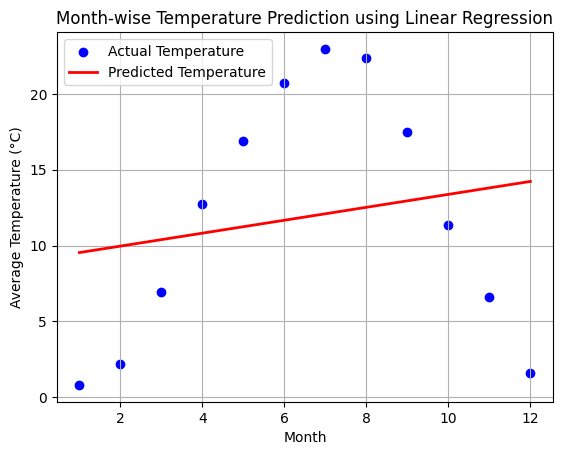

In [48]:
plt.scatter(X, y_true, color='blue', label='Actual Temperature')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted Temperature')

plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Month-wise Temperature Prediction using Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

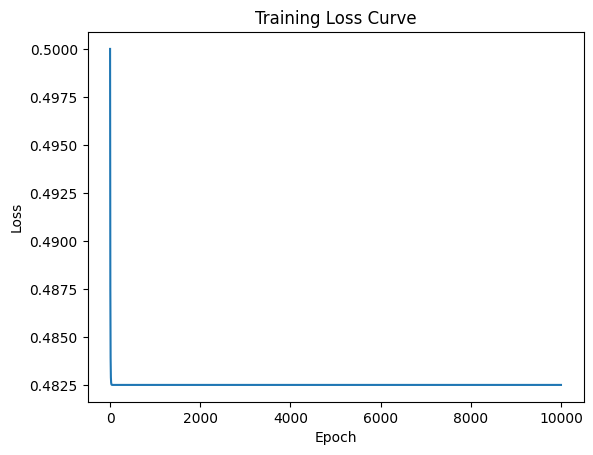

In [49]:
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()